In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
app_df=pd.read_csv("/content/apps.csv")

In [8]:
print(app_df)

      Unnamed: 0                                                App  \
0              0     Photo Editor & Candy Camera & Grid & ScrapBook   
1              1                                Coloring book moana   
2              2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3              3                              Sketch - Draw & Paint   
4              4              Pixel Draw - Number Art Coloring Book   
...          ...                                                ...   
9654       10836                                   Sya9a Maroc - FR   
9655       10837                   Fr. Mike Schmitz Audio Teachings   
9656       10838                             Parkinson Exercices FR   
9657       10839                      The SCP Foundation DB fr nn5n   
9658       10840      iHoroscope - 2018 Daily Horoscope & Astrology   

                 Category  Rating  Reviews  Size     Installs  Type Price  \
0          ART_AND_DESIGN     4.1      159  19.0      10,000+  Free   

Which categories have the most apps listed?

In [10]:
categories=app_df['Category'].value_counts()
print(categories)

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64


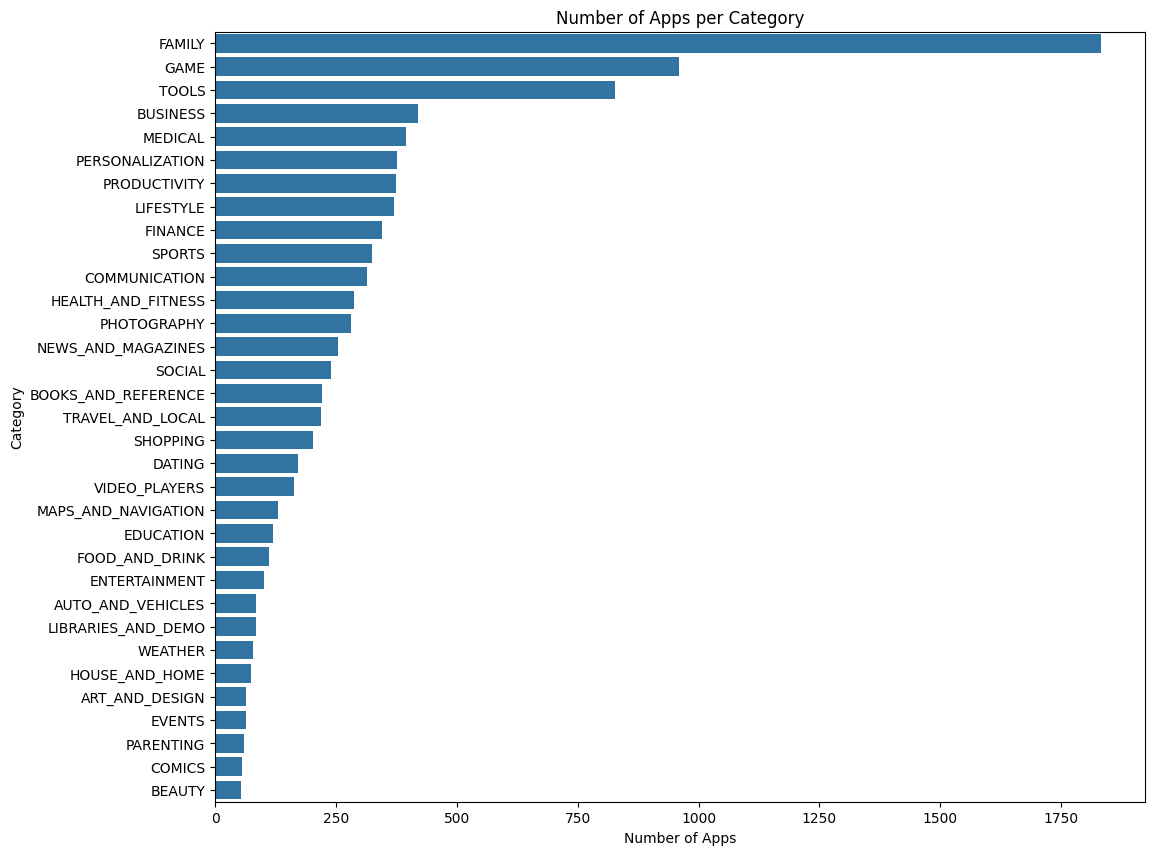

In [12]:
plt.figure(figsize=(12,10))
sns.barplot(x=categories.values, y=categories.index)
plt.title("Number of Apps per Category")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()


What is the average rating per category?

In [20]:
avg_rating=app_df.groupby('Category')['Rating'].mean()
print(avg_rating)

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179664
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.039554
TRAVEL_AND_LOCAL       4.069519

/tmp/ipython-input-32-1075007571.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index,palette="magma")


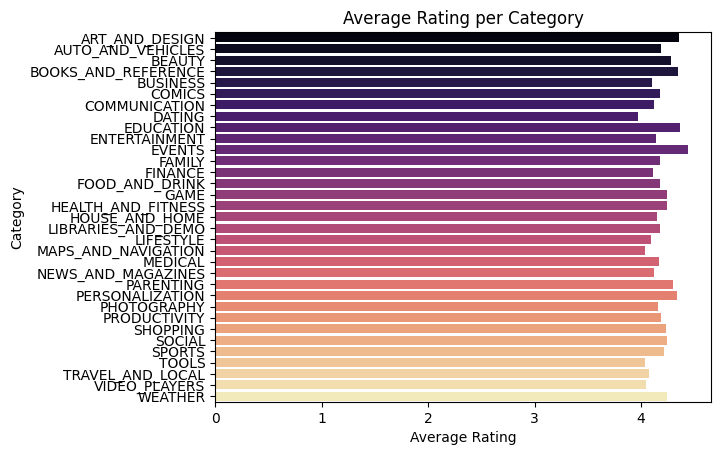

In [32]:
sns.barplot(x=avg_rating.values, y=avg_rating.index,palette="magma")
plt.title("Average Rating per Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()

Which apps have the highest number of reviews?

In [55]:
max_reviews=app_df["Reviews"].max()
high_rev_app=app_df[app_df["Reviews"]==max_reviews]
print(high_rev_app["App"],high_rev_app["Reviews"])


2002    Facebook
Name: App, dtype: object 2002    78158306
Name: Reviews, dtype: int64


What is the distribution of free vs paid apps across categories?

In [60]:
free_paid=app_df.groupby(["Category","Type"]).count()["App"].unstack()
print(free_paid)

Type                   Free   Paid
Category                          
ART_AND_DESIGN         61.0    3.0
AUTO_AND_VEHICLES      82.0    3.0
BEAUTY                 53.0    NaN
BOOKS_AND_REFERENCE   194.0   28.0
BUSINESS              408.0   12.0
COMICS                 56.0    NaN
COMMUNICATION         288.0   27.0
DATING                165.0    6.0
EDUCATION             115.0    4.0
ENTERTAINMENT         100.0    2.0
EVENTS                 63.0    1.0
FAMILY               1649.0  183.0
FINANCE               328.0   17.0
FOOD_AND_DRINK        110.0    2.0
GAME                  877.0   82.0
HEALTH_AND_FITNESS    273.0   15.0
HOUSE_AND_HOME         74.0    NaN
LIBRARIES_AND_DEMO     83.0    1.0
LIFESTYLE             350.0   19.0
MAPS_AND_NAVIGATION   126.0    5.0
MEDICAL               312.0   83.0
NEWS_AND_MAGAZINES    252.0    2.0
PARENTING              58.0    2.0
PERSONALIZATION       295.0   81.0
PHOTOGRAPHY           262.0   19.0
PRODUCTIVITY          346.0   28.0
SHOPPING            

Which content rating group has the highest average rating?

In [61]:
content_rating=app_df.groupby("Content Rating")["Rating"].mean()
print(content_rating)

Content Rating
Adults only 18+    4.300000
Everyone           4.166319
Everyone 10+       4.225902
Mature 17+         4.121849
Teen               4.225658
Unrated            4.100000
Name: Rating, dtype: float64


What pricing trends exist for paid apps?

/tmp/ipython-input-75-4057027746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Price",y="Category",data=paid_app,palette="magma")


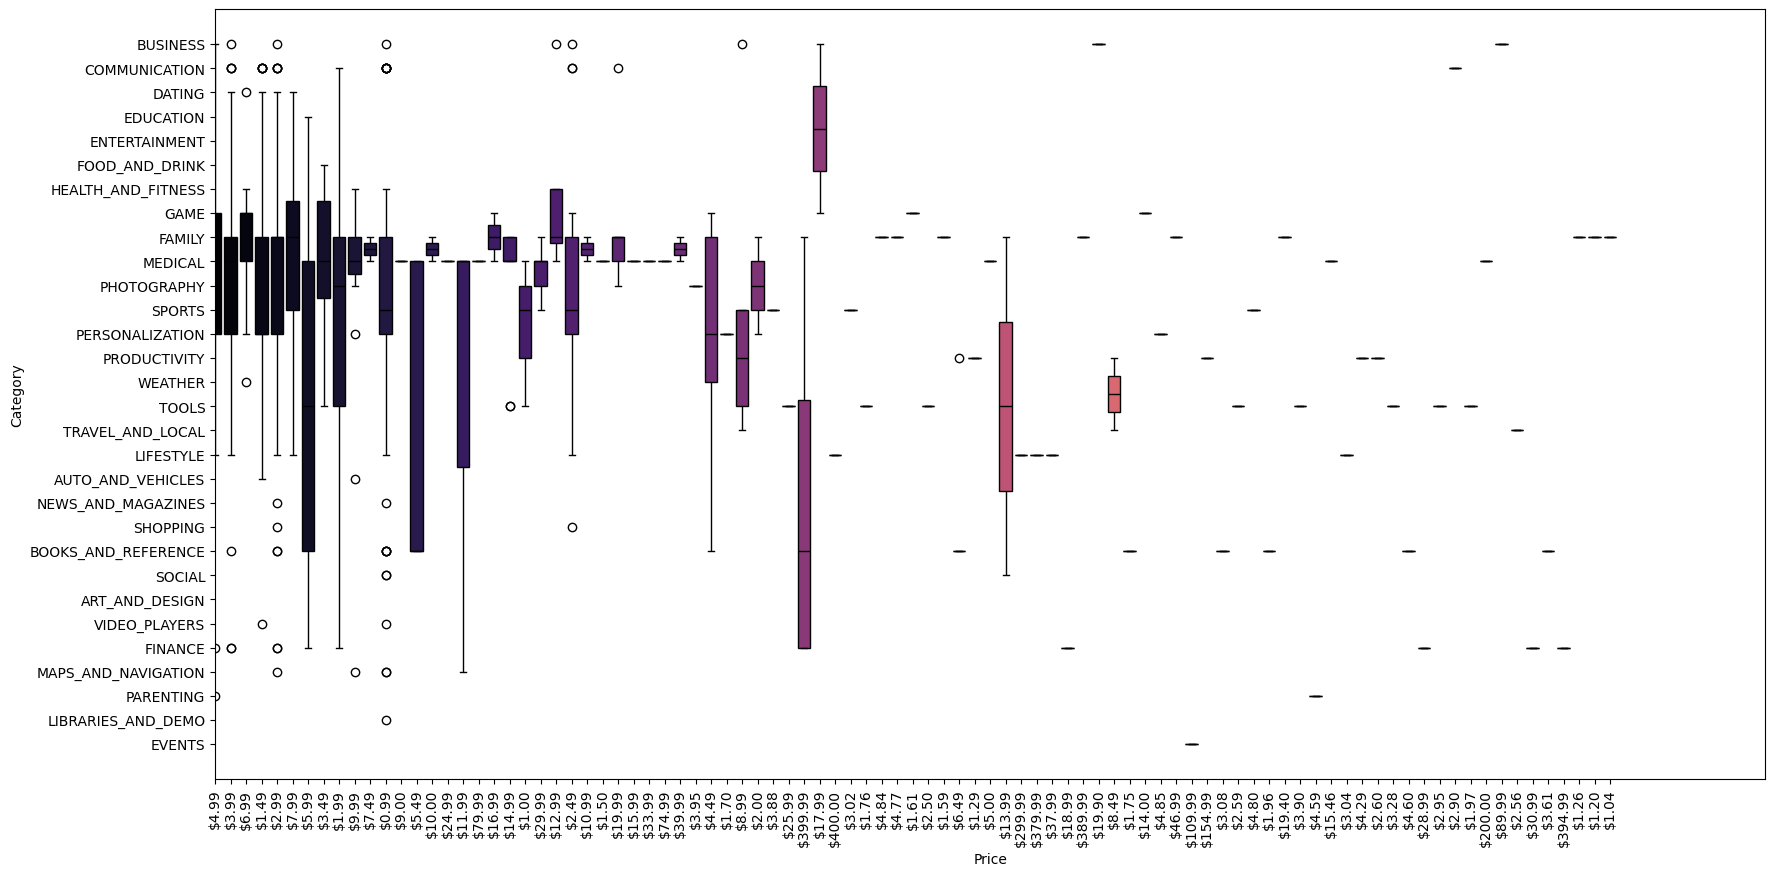

In [75]:
paid_app=app_df[app_df["Type"]=="Paid"]
plt.figure(figsize=(20,10))
sns.boxplot(x="Price",y="Category",data=paid_app,palette="magma")
plt.xlim(0,100)
plt.xticks(rotation=90)
plt.show()

Which apps have the highest install counts?



In [83]:
app_df["Installs"]=app_df["Installs"].str.replace("+","",regex=False)
app_df["Installs"]=app_df["Installs"].str.replace(",","",regex=False)
app_df["Installs"]=app_df["Installs"].astype(int)
topinstall=app_df.groupby("App")["Installs"].sum().sort_values(ascending=False)
print(topinstall.head(10))

App
WhatsApp Messenger                          1000000000
Skype - free IM & video calls               1000000000
YouTube                                     1000000000
Google                                      1000000000
Messenger – Text and Video Chat for Free    1000000000
Maps - Navigate & Explore                   1000000000
Google Drive                                1000000000
Facebook                                    1000000000
Google News                                 1000000000
Hangouts                                    1000000000
Name: Installs, dtype: int64


Which app categories have the highest variance in user ratings?


Category
LIFESTYLE             0.496956
MEDICAL               0.477459
HEALTH_AND_FITNESS    0.447318
BUSINESS              0.435418
FINANCE               0.434475
DATING                0.406771
TOOLS                 0.384737
FOOD_AND_DRINK        0.321377
NEWS_AND_MAGAZINES    0.321010
VIDEO_PLAYERS         0.317862
Name: Rating, dtype: float64


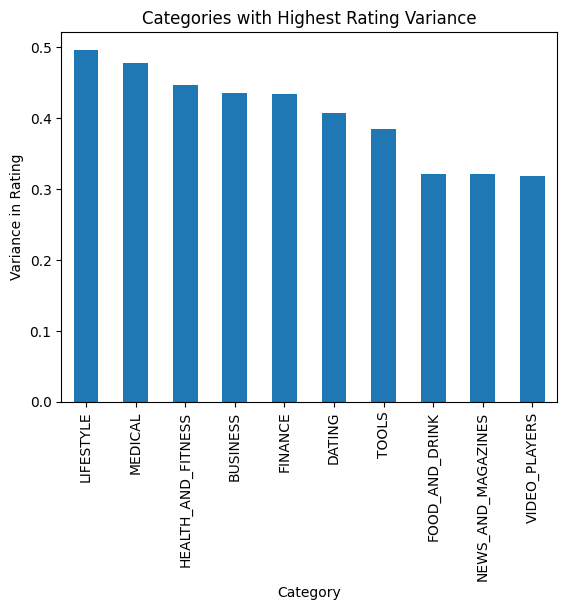

In [88]:
rating_variance = app_df.groupby("Category")["Rating"].var().sort_values(ascending=False)
print(rating_variance.head(10))
rating_variance.head(10).plot(kind='bar', title='Categories with Highest Rating Variance')
plt.ylabel('Variance in Rating')
plt.show()
